In [ ]:
"""
Answers to 'Theorical Neuroscience, Dayan-Abbott (2001)' exersises
Chapter 6 : Model Neurons II: Conductances and Morphology
Question 1
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Mahdi Fallah
https://github.com/fallahtp
fallahtp@gmail.com
"""

In [32]:
# ============================================================================
# Imports
# ============================================================================
from brian2 import *

# ============================================================================
# Setting Parameters
# ============================================================================

# defaultclock = 0.1 * ms
c_m = 10 * nF/mm**2
I_e = 200 * nA/mm**2
g_L = 0.003 * mS/mm2
E_L = -17 * mV
g_Na = 1.2 * mS/mm2
g_K = 0.2 * mS/mm2
g_A = 0.447 * mS/mm2
E_Na = 55 * mV
E_K = -72 * mV
E_A = -75 * mV

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s


Text(0, 0.5, 'b')

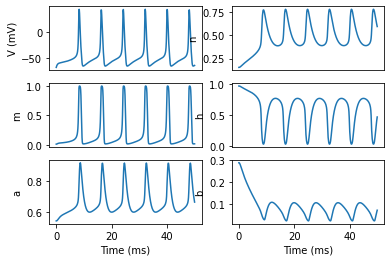

In [33]:
# ============================================================================
# Simulation 1
# ============================================================================
start_scope()
eqs="""
dv/dt = (-i_m + I_e)/c_m : volt

i_m = g_L*(v-E_L)+g_Na*(m**3)*h*(v-E_Na)+g_K*(n**4)*(v-E_K)+g_A*(a**3)*b*(v-E_A) : amp/meter**2

tau_n = 1/(alpha_n + beta_n) : second
tau_m = 1/(alpha_m + beta_m) : second
tau_h = 1/(alpha_h + beta_h) : second
tau_a = (0.3632 + (1.158/(1+exp(0.0497*(v/mV + 55.96))))) * ms : second
tau_b = (1.24 + (2.678/(1+exp(0.0624*(v/mV+50))))) * ms : second

n_inf = alpha_n/(alpha_n + beta_n) : 1
m_inf = alpha_m/(alpha_m + beta_m) : 1
h_inf = alpha_h/(alpha_h + beta_h) : 1
a_inf = (0.0761*exp(0.0314*(v/mV+94.22))/(1+exp(0.0346*(v/mV+1.17))))**(1.0/3) : 1
b_inf = (1/(1+exp(0.0688*(v/mV+53.3))))**4 : 1

dn/dt = alpha_n * (1-n) - beta_n * n : 1
dm/dt = (m_inf-m)/tau_m : 1
dh/dt = (h_inf-h)/tau_h : 1
da/dt = (a_inf-a)/tau_a : 1
db/dt = (b_inf-b)/tau_b : 1

alpha_n = (0.2/exprel(-0.1*(v/mV+45.7))) / ms : Hz
beta_n = (0.25*exp(-0.0125*(v/mV+55.7))) / ms : Hz
alpha_m = (3.8/exprel(-0.1*(v/mV+29.7))) / ms : Hz
beta_m = (15.2*exp(-0.0556*(v/mV+54.7))) / ms : Hz
alpha_h = (0.266*exp(-0.05*(v/mV+48))) / ms : Hz
beta_h = (3.8/(1+exp(-0.1*(v/mV+18)))) / ms : Hz
"""

G = NeuronGroup(1, model=eqs, method='exponential_euler')
G.v = -68 * mV
G.m = 0.0101
G.h = 0.9659
G.n = 0.1559
G.a = 0.5404
G.b = 0.2887

statemon = StateMonitor(G, ['v', 'm', 'h', 'n', 'a', 'b'], record=0)

run(50*ms, report='stdout')

# ============================================================================
# Plots
# ============================================================================
figure()

subplot(3, 2, 1)
plot(statemon.t/ms, statemon.v[0, :]/mV)
xticks([])
ylabel('V (mV)')

subplot(3, 2, 2)
plot(statemon.t/ms, statemon.n[0, :])
xticks([])
ylabel('n')

subplot(3, 2, 3)
plot(statemon.t/ms, statemon.m[0, :])
xticks([])
ylabel('m')

subplot(3, 2, 4)
plot(statemon.t/ms, statemon.h[0, :])
xticks([])
ylabel('h')

subplot(3, 2, 5)
plot(statemon.t/ms, statemon.a[0, :])
xlabel('Time (ms)')
ylabel('a')

subplot(3, 2, 6)
plot(statemon.t/ms, statemon.b[0, :])
xlabel('Time (ms)')
ylabel('b')


WARNING    "I_e" is an internal variable of group "neurongroup_3", but also exists in the run namespace with the value 0.2 * amp / meter ** 2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


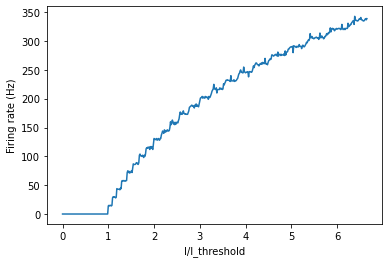

In [34]:
# ============================================================================
# Simulation 2
# ============================================================================
start_scope()
N = 500 # Number of neurons
duration = 1 * second
I_max = 500.0 * namp/mm2 # Maximum external current

# n & m have orginal shape of equations (not with n_inf and m_inf), For ZeroDevisionError
eqs="""
dv/dt = (-i_m + I_e)/c_m : volt

I_e : amp/meter**2

i_m = g_L*(v-E_L)+g_Na*(m**3)*h*(v-E_Na)+g_K*(n**4)*(v-E_K)+g_A*(a**3)*b*(v-E_A) : amp/meter**2

tau_n = 1/(alpha_n + beta_n) : second
tau_m = 1/(alpha_m + beta_m) : second
tau_h = 1/(alpha_h + beta_h) : second
tau_a = (0.3632 + (1.158/(1+exp(0.0497*(v/mV + 55.96))))) * ms : second
tau_b = (1.24 + (2.678/(1+exp(0.0624*(v/mV+50))))) * ms : second

n_inf = alpha_n/(alpha_n + beta_n) : 1
m_inf = alpha_m/(alpha_m + beta_m) : 1
h_inf = alpha_h/(alpha_h + beta_h) : 1
a_inf = (0.0761*exp(0.0314*(v/mV+94.22))/(1+exp(0.0346*(v/mV+1.17))))**(1.0/3) : 1
b_inf = (1/(1+exp(0.0688*(v/mV+53.3))))**4 : 1

dn/dt = alpha_n * (1-n) - beta_n * n : 1
dm/dt = alpha_m * (1-m) - beta_m * m : 1
dh/dt = (h_inf-h)/tau_h : 1
da/dt = (a_inf-a)/tau_a : 1
db/dt = (b_inf-b)/tau_b : 1

alpha_n = (0.2/exprel(-0.1*(v/mV+45.7))) / ms : Hz
beta_n = (0.25*exp(-0.0125*(v/mV+55.7))) / ms : Hz
alpha_m = (3.8/exprel(-0.1*(v/mV+29.7))) / ms : Hz
beta_m = (15.2*exp(-0.0556*(v/mV+54.7))) / ms : Hz
alpha_h = (0.266*exp(-0.05*(v/mV+48))) / ms : Hz
beta_h = (3.8/(1+exp(-0.1*(v/mV+18)))) / ms : Hz
"""


G = NeuronGroup(N, model=eqs, method='exponential_euler', threshold='v>-40*mV')
G.v = -68 * mV
G.m = 0.0101
G.h = 0.9659
G.n = 0.1559
G.a = 0.5404
G.b = 0.2887
G.I_e = 'I_max*i/N'

statemon = StateMonitor(G, ['I_e', 'v'], record=True)
spikemon = SpikeMonitor(G, record=True)

run(100*ms, report='stdout')

rate = spikemon.count // duration

I_th = statemon.I_e[(nonzero(rate)[0][0]), 0]

# ============================================================================
# Plot
# ============================================================================
plot(statemon.I_e[:, 0]/I_th, rate/Hz)
xlabel('I/I_threshold')
ylabel('Firing rate (Hz)')
show()

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s


Text(0.5, 0, 'Time (ms)')

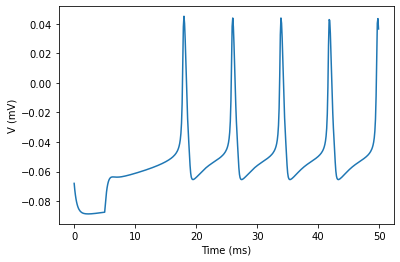

In [35]:
# ============================================================================
# Simulation 3
# ============================================================================
start_scope()
eqs="""
dv/dt = (-i_m + I_e)/c_m : volt

I_e = -500.0*(nA/mm2) * int(t<5*ms) + 200.0*(nA/mm2) * int(t>5*ms) : amp/meter**2

i_m = g_L*(v-E_L)+g_Na*(m**3)*h*(v-E_Na)+g_K*(n**4)*(v-E_K)+g_A*(a**3)*b*(v-E_A) : amp/meter**2

tau_n = 1/(alpha_n + beta_n) : second
tau_m = 1/(alpha_m + beta_m) : second
tau_h = 1/(alpha_h + beta_h) : second
tau_a = (0.3632 + (1.158/(1+exp(0.0497*(v/mV + 55.96))))) * ms : second
tau_b = (1.24 + (2.678/(1+exp(0.0624*(v/mV+50))))) * ms : second

n_inf = alpha_n/(alpha_n + beta_n) : 1
m_inf = alpha_m/(alpha_m + beta_m) : 1
h_inf = alpha_h/(alpha_h + beta_h) : 1
a_inf = (0.0761*exp(0.0314*(v/mV+94.22))/(1+exp(0.0346*(v/mV+1.17))))**(1.0/3) : 1
b_inf = (1/(1+exp(0.0688*(v/mV+53.3))))**4 : 1

dn/dt = alpha_n * (1-n) - beta_n * n : 1
dm/dt = (m_inf-m)/tau_m : 1
dh/dt = (h_inf-h)/tau_h : 1
da/dt = (a_inf-a)/tau_a : 1
db/dt = (b_inf-b)/tau_b : 1

alpha_n = (0.2/exprel(-0.1*(v/mV+45.7))) / ms : Hz
beta_n = (0.25*exp(-0.0125*(v/mV+55.7))) / ms : Hz
alpha_m = (3.8/exprel(-0.1*(v/mV+29.7))) / ms : Hz
beta_m = (15.2*exp(-0.0556*(v/mV+54.7))) / ms : Hz
alpha_h = (0.266*exp(-0.05*(v/mV+48))) / ms : Hz
beta_h = (3.8/(1+exp(-0.1*(v/mV+18)))) / ms : Hz
"""

G = NeuronGroup(1, model=eqs, method='exponential_euler')
G.v = -68 * mV
G.m = 0.0101
G.h = 0.9659
G.n = 0.1559
G.a = 0.5404
G.b = 0.2887

statemon = StateMonitor(G, ['v', 'I_e'], record=0)

run(50*ms, report='stdout')

plot(statemon.t/ms, statemon.v[0, :])
ylabel('V (mV)')
xlabel('Time (ms)')